Redoing the period fits with everything I've learned from GD394 etc.

In [4]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u
from astropy.modeling import models, fitting
from astropy.timeseries import LombScargle

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
wdrvs = Table.read('dv_lists/wd_dvs.ecsv')
bdrvs = Table.read('dv_lists/ca_dvs.ecsv')

-96.18186760319136 13.116201756990355
4.211460863763268


/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


76.3664735774323 77.44350325076233
4.267079256713429


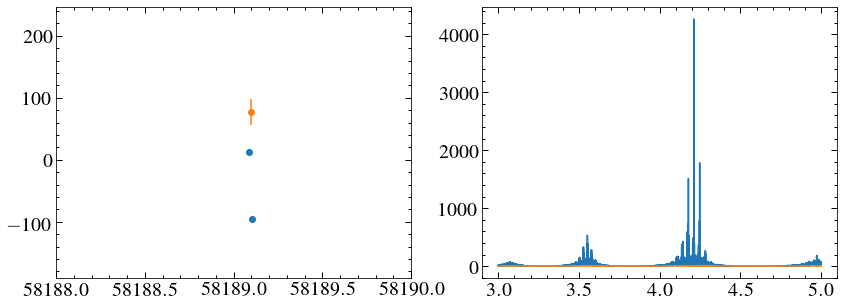

In [44]:
for data in [bdrvs, wdrvs]:
    plt.subplot(121)
    td, v, ve = np.array(data['MJD']), np.array(data['VELOCITY']), np.array(data['ERROR'])
   # v[1], v[2] = v[2], v[1]
    plt.errorbar(td, v, yerr=ve, marker='o', ls='none')
    
    #plt.xlim(58601, 58603)
    plt.xlim(58188, 58190)
    plt.subplot(122)
    th = td*24
    v[1], v[2] = v[2], v[1]
    print(v[1], v[2])
    frequency, power = LombScargle(th, v, dy=ve, normalization='model').autopower(minimum_frequency = 1/5, maximum_frequency = 1/3)
    plt.plot(1/frequency, power)
    period = 1/frequency[np.argmax(power)]
    print(period)
    
    

Fit the companion first

4.220376096465758
58.45367139159384
167.30825848634728
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Sine1D(amplitude=162.31913767, frequency=5.68668113, phase=0.01519103)>

    [1]: <Const1D(amplitude=53.15610482)>
Parameters:
       amplitude_0        frequency_0          phase_0           amplitude_1    
    ------------------ ----------------- -------------------- ------------------
    162.31913767282686 5.686681133815076 0.015191026483675069 53.156104817148425
4.220387856334561


(58601, 58602.5)

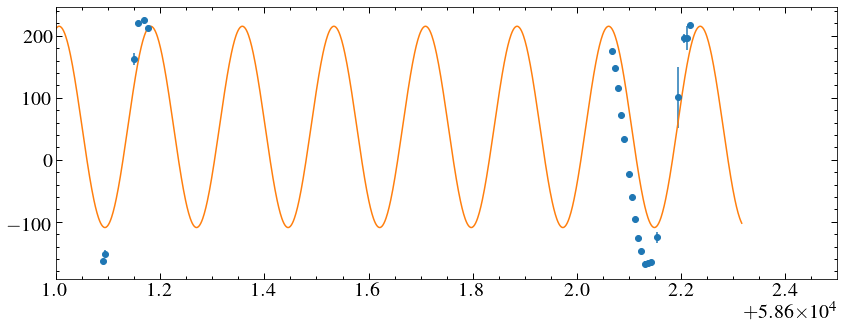

In [110]:
fitter = fitting.LevMarLSQFitter()
data =bdrvs
td, v, ve = np.array(data['MJD']), np.array(data['VELOCITY']), np.array(data['ERROR'])
td, v, ve = td[3:], v[3:], ve[3:]
#v[1], v[2] = v[2], v[1]
th = td*24
frequency, power = LombScargle(td, v, dy=ve, normalization='model').autopower(minimum_frequency = 24/5, maximum_frequency = 24/3, samples_per_peak=10)
#plt.plot(24/frequency, power)
period = 1/frequency[np.argmax(power)]
print(period*24)
#plt.show()
    
   # v[1], v[2] = v[2], v[1]
plt.errorbar(td, v, yerr=ve, marker='o', ls='none')
v_offset = max(v)-abs(min(v))
print(v_offset)
print(max(v)-v_offset)
sin_mod =  models.Sine1D(amplitude=max(v)-v_offset, frequency=1/period) +  models.Const1D(v_offset)
sin_fit = fitter(sin_mod, td, v, maxiter=100000)
timefit = np.arange(td[0]-0.1,td[-1]+0.1, 0.001)
plt.plot(timefit, sin_fit(timefit))
plt.xlim()
print(sin_fit)
print(24/sin_fit[0].frequency)
plt.xlim(58601, 58602.5)
#plt.xlim(58167, 58191)
